# Representing a scalar

You can construct and manipulate a population of neurons (ensemble) in nengo. This model
shows shows how the activity of neural populations can be thought of as representing a
mathematical variable (a scalar value).

In [1]:
# Setup the environment
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import nengo
from nengo.dists import Choice, Uniform
from nengo.utils.ensemble import tuning_curves

## Create the Model

This model has parameters as described in the book and uses a single population
(ensemble) of 100 LIF neurons. Note that the default max rates in Nengo 2.0 are (200,
400), so you have to explicitly specify them to be (100, 200) to create the model with
the same parameters as described in the book. Moreover the "Node Factory" feature of
ensembles mentioned in the book maps to the `neuron_type` in Nengo 2.0 which is set to
LIF by default. The default values of `tauRC`, `tauRef`, `radius` and `intercepts` in
Nengo 2.0
are the same as those mentioned in the book.

In [2]:
# Create the network object to which we can add ensembles, connections, etc.
model = nengo.Network(label="Many Neurons")

with model:
    # Input stimulus to drive the neural ensemble
    # Input sine wave with range 1
    stim = nengo.Node(lambda t: np.sin(16 * t), label="input")

    # Input sine wave with range increased to 4 (uncomment to use)
    # stim = nengo.Node(lambda t: 4 * np.sin(16 * t), label="input")

    # Ensemble with 100 LIF neurons
    x = nengo.Ensemble(100, dimensions=1, max_rates=Uniform(100, 200))

    # Connecting input stimulus to ensemble
    nengo.Connection(stim, x)

## Run the model

Import the `nengo_gui` visualizer to run and visualize the model.

In [ ]:
from nengo_gui.ipython import IPythonViz

IPythonViz(model, "ch2-scalars.py.cfg")

Press the play button in the visualizer to run the simulation. You should see the graphs
as shown in the figure below.

The graph on the top left shows the input and the graph on the top right shows the the
decoded value of the neural spiking (a linearly decoded estimate of the input). The
graph on the bottom right shows the spike raster which is the spiking output of the
neuron population (`x`).

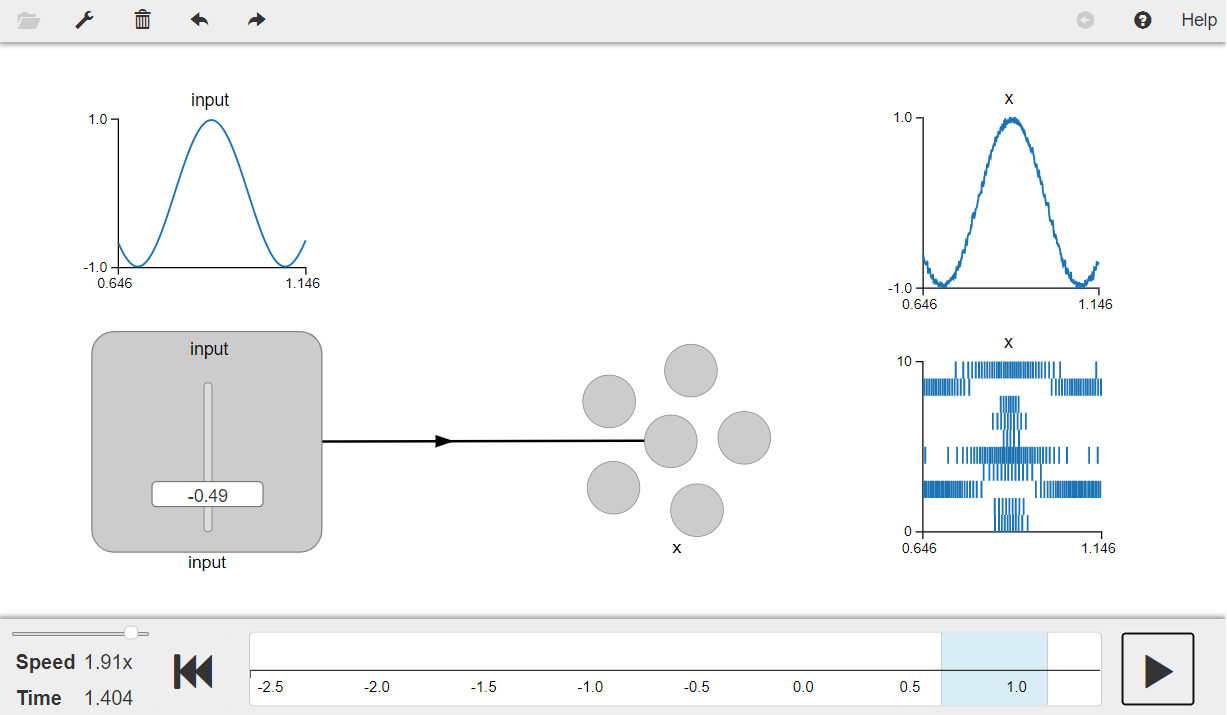

In [3]:
from IPython.display import Image

Image(filename="ch2-scalars.png")

### Increasing the range of Input

You have seen that the population of neurons does a reasonably good job of representing
the input. However, neurons cannot represent arbitrary values well and you can verify
this by increasing the range of the input to 4 (uncomment the line of code that reads
`input = nengo.Node(lambda t:
4*np.sin(16 * t))`, and re-run cells 2 and 3). You will observe the same saturation
effects as described in the
book, showing that the neurons do a much better job at representing information within
the defined radius.

### Plotting the Tuninig Curves

The tuning curve of a neurons tells us how it responds to an incoming input signal.
Looking at the tuning curves of the neurons in an ensemble is one of the most common
ways to debug failures in a model.

For a one-dimensional ensemble, since the input is a scalar, we can use the input as
x-axis and the neuron response as y-axis.

In [4]:
# Alternative way to run a Nengo model

# Create the Nengo simulator
with nengo.Simulator(model) as sim:
    sim.run(1)  # Run the simulation for 1 second

Text(0.5, 0, 'Input scalar, x')

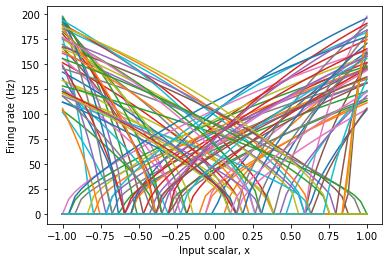

In [5]:
# Plot the tuning curves of the ensemble
plt.figure()
plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

If there is some biological or functional reason to impose some pattern to the neuron
responses, you can do so by changing the parameters of the ensemble.

Text(0.5, 0, 'Input scalar, x')

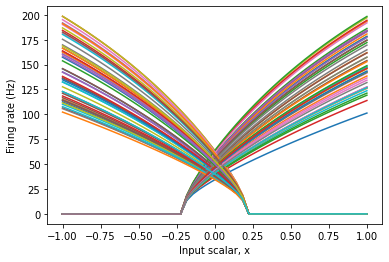

In [6]:
# Change the intercepts of all the neurons in `x` to -0.2
x.intercepts = Choice([-0.2])

with nengo.Simulator(model) as sim:
    plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

Note that in the above figure, some neurons start firing at -0.2, while others stop
firing at 0.2. This is because the input signal, x, is multiplied by a neuron's encoder
when it is converted to input current. You can also constrain the tuning curves by
changing the encoders of the ensemble.

Text(0.5, 0, 'Input scalar, x')

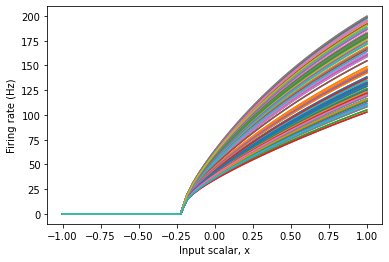

In [7]:
# Change the encoders of all neurons in `x` to [1]
x.encoders = Choice([[1]])

with nengo.Simulator(model) as sim:
    plt.plot(*tuning_curves(x, sim))
plt.plot(*tuning_curves(x, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x")

This gives us an ensemble of neurons that respond very predictably to input. In some
cases, this is important for the proper functioning of a model, or to match what we know
about the physiology of a brain area or neuron type.